In [1]:
# Functions for sanitizing number of birds data
import sys

def splitNumStr(s):

    '''Splits number of birds given as a range like 2-3 or 2to3 or 2--3 
    with the number of white space characters between the separator being variable'''

    avg = lambda a : int(a[1].strip())/2 + int(a[0].strip())/2
    if s.find("to")!=-1:
        a=s.split("to")
    elif s.find("--")!=-1:
        a=s.split("--")
    elif s.find("-")!=-1:
        a=s.split("-")
    else:
        return None
    try:
        return avg(a)
    except:
        return None

def getNumDirectly(s):

    '''Gets the number of birds observed directly if it was entered as a valid number or as words like one between 0 and 150'''

    try:
        num = int(float(s))
        assert num<=150 and num>0
        return num
    except:
        try:
            return w2n.word_to_num(s)
        except:
            return None
        return None

def getApproximateNum(s):

    '''Gets approximate number entered like ~10 or around 10 or approx 10'''

    if s.find("around")!=-1:
        s=s.replace("around", "")
    elif s.find("approx")!=-1:
        s=s.replace("approx", "")
    elif s.find("~")!=-1:
        s=s.replace("~","")
    else:
        return None
    try:
        return int(float(s))
    except:
        return None

numOfBirdsSanitizers=[getNumDirectly, splitNumStr, getApproximateNum] # List of all sanitizing functions

def sanitizeNumOfBirds(s):

    '''Calls the entire battery of sanitizing functions'''

    for i in numOfBirdsSanitizers:
        res=i(s)
        if res!=None:
            return res
    return None


In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from word2number import w2n
from Levenshtein import distance
import xlrd
workbookName="Test.xlsx"
colNumForStudName=0
colNumForBirdName=3
colNumForBirdNum=5
wb = xlrd.open_workbook("DummyData/"+workbookName)
sheet = wb.sheet_by_index(0)
data={}
fkup=[]
f=open(workbookName+"RejectLogs.txt",'a')
f.truncate(0)
g=open(workbookName+"SimilarityLogs.txt",'a')
g.truncate(0)
for i in range(0,sheet.nrows):
    name=sheet.cell_value(i,colNumForBirdName).lower()
    strNum=str(sheet.cell_value(i,colNumForBirdNum)).lower()
    num=sanitizeNumOfBirds(strNum)
    if(num==None):
        rejStr=""
        rejStr="Data of "+str(sheet.cell_value(i,colNumForStudName))+" at row number "+str(i+1)+" has been rejected.\nCause of rejection-"
        rejStr+="\nNumber of birds was equal to:"+strNum+"\n---------------\n"
        f.write(rejStr)
        print(rejStr)
        continue
    if distance(name,"unknown")<=3 or distance(name,"unidentified")<=3 or distance(name,"Not known")<=3:
        rejStr=""
        rejStr="Data of "+str(sheet.cell_value(i,colNumForStudName))+" at row number "+str(i+1)+" has been rejected.\nCause of rejection-"
        rejStr+="\nName of bird was equal to:"+name+"\n---------------\n"
        f.write(rejStr)
        print(rejStr)
        continue
    else:
        keyList=data.keys()
        if keyList!=[]:
            highest=process.extractOne(name,list(data.keys()))
            if (highest!=None) and ( (len(name)<=4 and distance(name,highest[0])==1) or (len(name)>=7 and distance(name,highest[0])<=2) or (len(name)>=7 and distance(name,highest[0])<=3) ):
                if(name!=highest):
                    similarityStr=""
                    similarityStr=name+" and "+str(highest[0])+" are considered to be the same bird\nSee row number "+str(i+1)
                    similarityStr+="\nThis happened in the data provided by "+str(sheet.cell_value(i,colNumForStudName))+"\n--------------\n"
                    print(similarityStr)
                    g.write(similarityStr)
                data[highest[0]]+=num
            else:
                data[name]=num
        else:
            data[name]=num
f.close()
g.close()

red-vented bulbul and red vented bulbul are considered to be the same bird
See row number 10
This happened in the data provided by Prajakta Mane
--------------

golden-fronted leafbird and golden-fronted leafbird are considered to be the same bird
See row number 11
This happened in the data provided by Prajakta Mane
--------------

common myna and common myna are considered to be the same bird
See row number 20
This happened in the data provided by Prajakta Mane
--------------

red vented bulbul and red vented bulbul are considered to be the same bird
See row number 21
This happened in the data provided by Prajakta Mane
--------------

asian koel and asian koel are considered to be the same bird
See row number 22
This happened in the data provided by Prajakta Mane
--------------

jungle babbler and jungle babbler are considered to be the same bird
See row number 23
This happened in the data provided by Prajakta Mane
--------------

golden-fronted leafbird and golden-fronted leafbird ar

In [3]:
import matplotlib.pyplot as pl
nameList = []
numList = []
for i in data:
    nameList.append(i)
    numList.append(data[i])

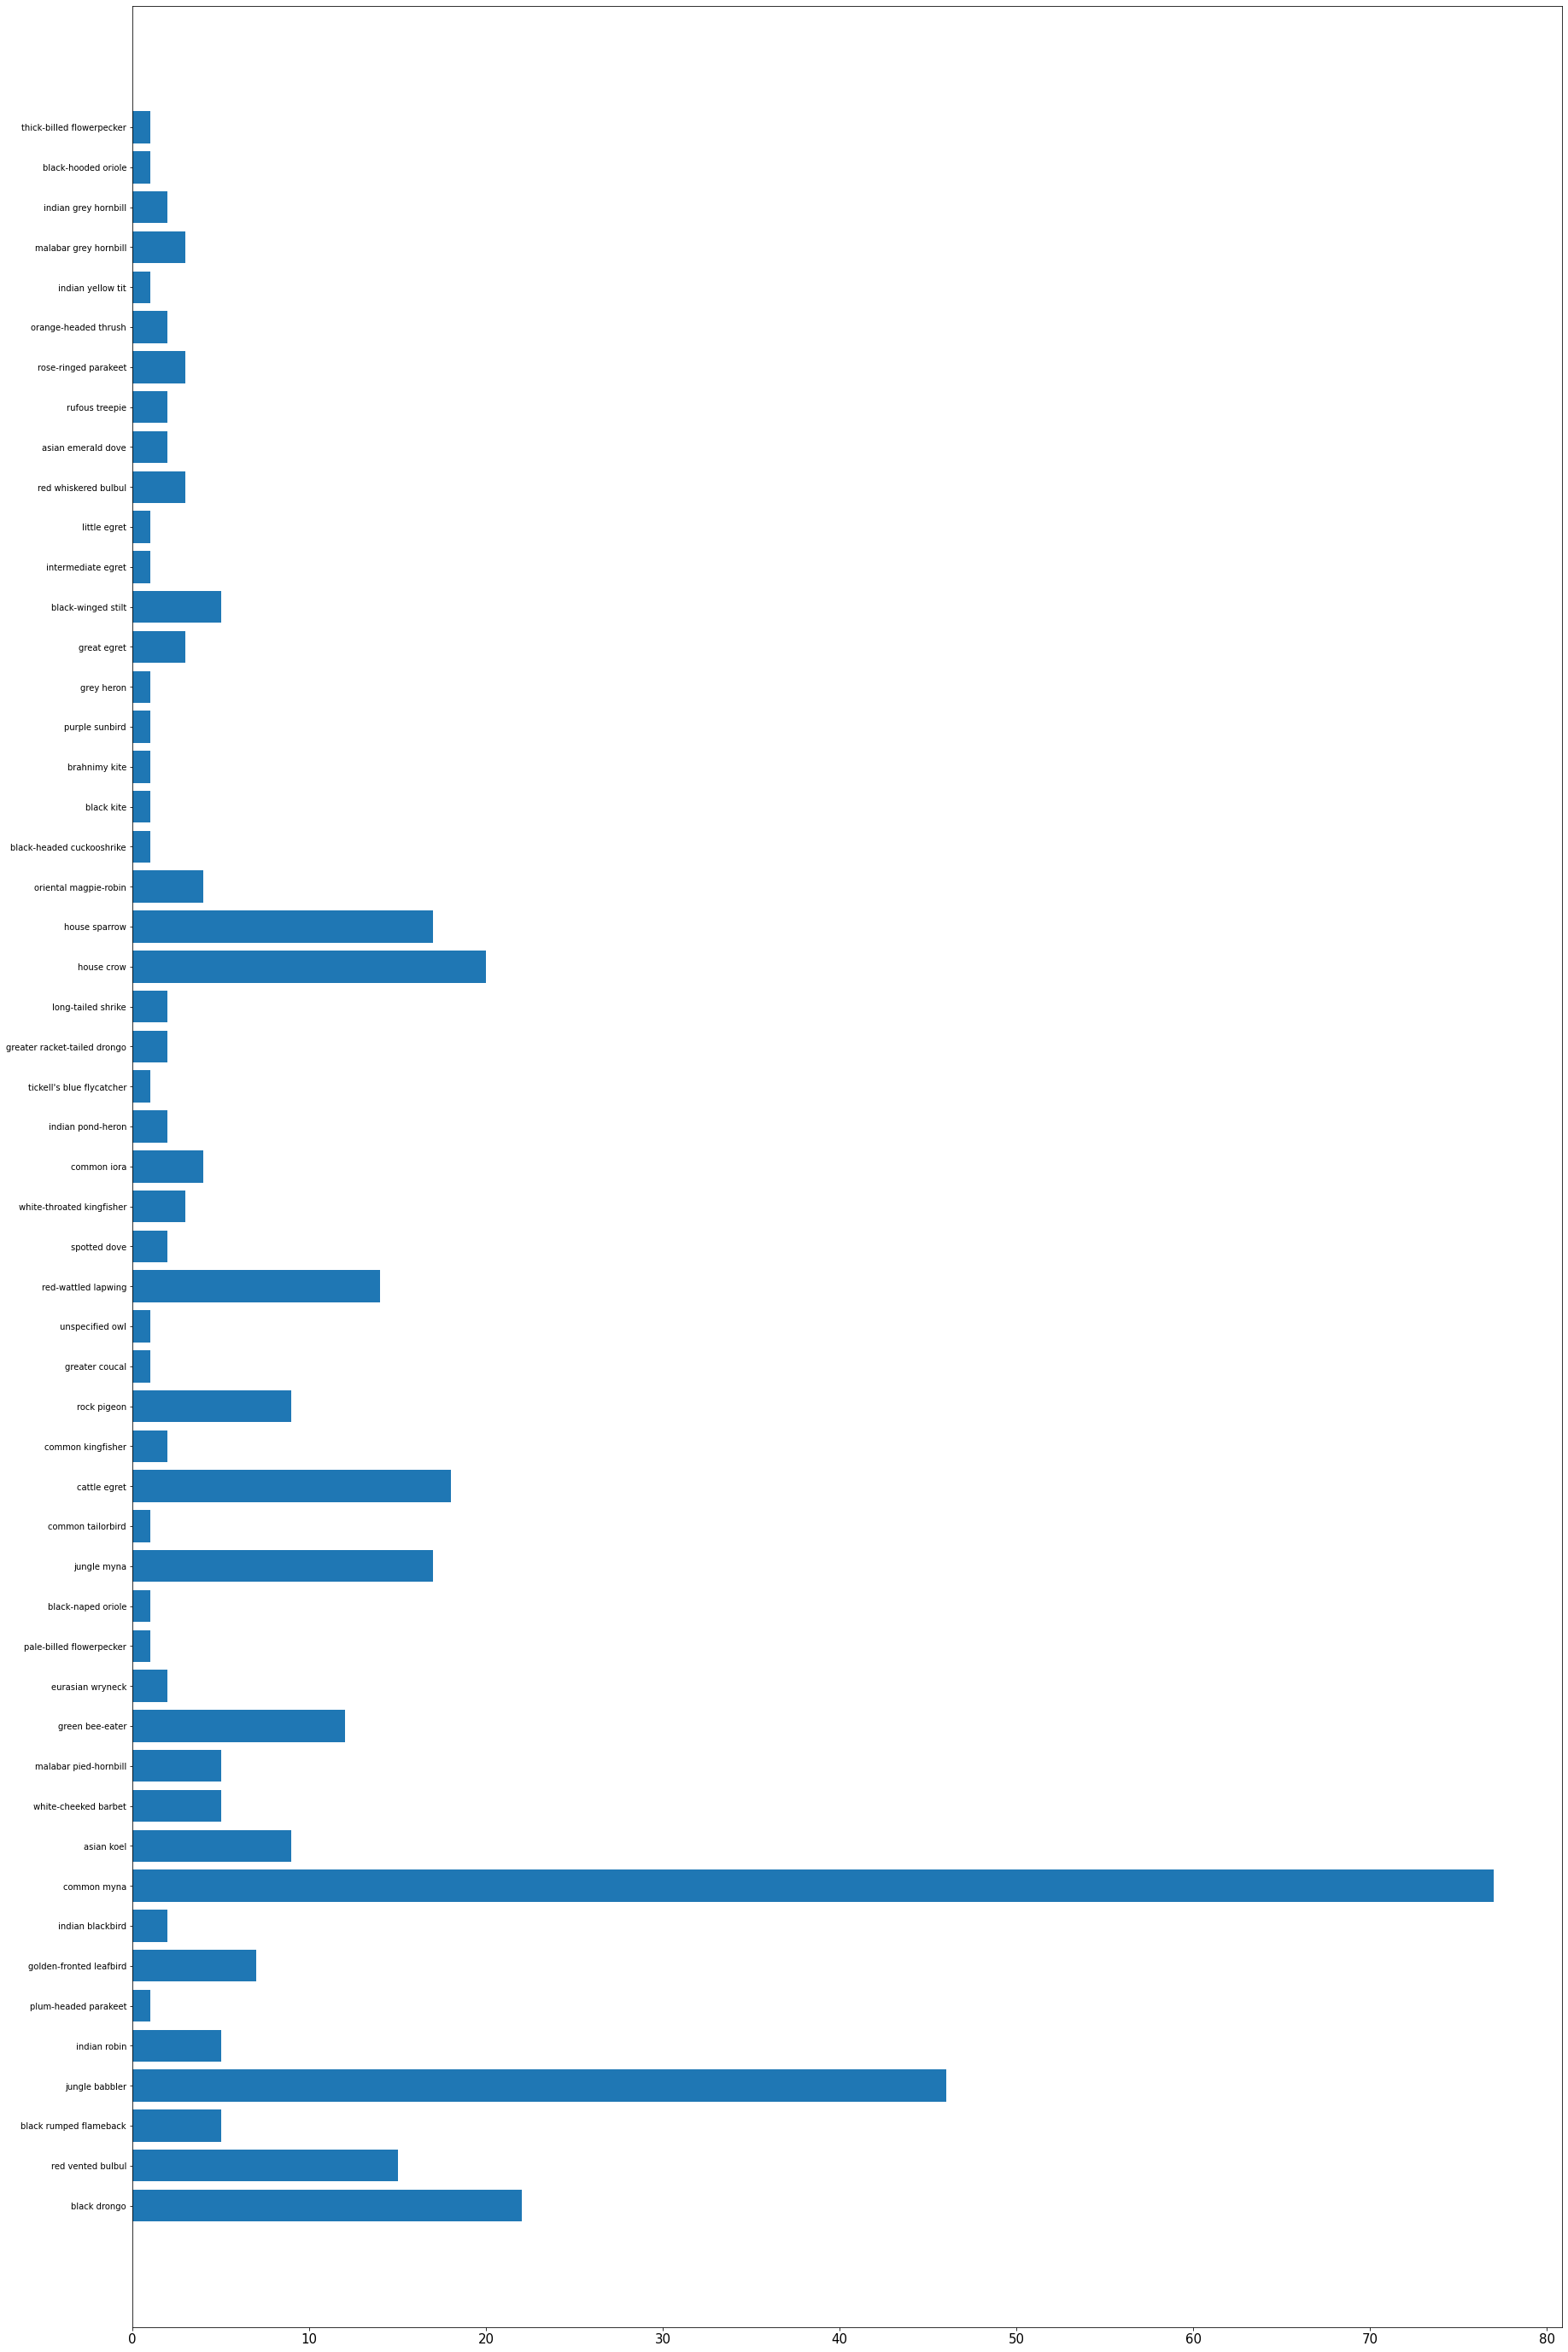

In [4]:
fig=pl.figure(figsize=(30,50))
pl.barh(nameList,numList,0.8)
pl.xticks(fontsize=15)
pl.show()
fig.savefig("birdDataM1.jpg",dpi=100,bbox_inches='tight')